In [1]:
from IPython.display import display
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

from graph_lib.spatial_graph import SpatialGraph, GIRG, LongRangePercolation, VertexSet, ConfigurationModel
# from spreading_model import SEIRTMarkovian

rc('animation', html='html5')

# Draw graphs where the edge uniforms are fixed (and graphs coupled)

In [ ]:
vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, dimension=2)
# edge_rvs = np.random.random((vertex_set.number_of_vertices,vertex_set.number_of_vertices))

In [ ]:
c1 = 0.7
c2 = 0.9
girg = GIRG(vertex_set=vertex_set, alpha=2.3, tau=3.3, c1=c1, c2=c2, on_torus=False)
girg.sample_graph()
# girg.sample_graph()
# graph_nx = girg.to_networkx_graph(centre_vertex=5)
# graph_long = girg.truncate_long_edges(15.5)
girg.average_degree

In [ ]:
fig = plt.figure(figsize=(9,9))
girg.draw(node_size=-20*np.log(vertex_set.weights))
plt.axis('off')

In [ ]:
girg2 = GIRG(vertex_set=vertex_set, alpha=1.4, tau=3.3, c1=c1, c2=c2, on_torus=False)
girg2.sample_graph()
girg2.average_degree

In [ ]:
girg2.to_networkx_graph()

In [ ]:
girg = GIRG(vertex_set=vertex_set, alpha=2.3, tau=3.3, c1=c1, c2=c2, on_torus=False)
girg.sample_graph(edge_rvs)
fig = plt.figure(figsize=(9,9))
girg.draw(node_size=-20*np.log(vertex_set.weights))
plt.axis('off')
# plt.savefig("single-graph.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

In [ ]:
girg = GIRG(vertex_set=vertex_set, alpha=10.3, tau=3.3, c1=c1, c2=c2, on_torus=False)
girg.sample_graph(edge_rvs)
fig = plt.figure(figsize=(9,9))
girg.draw(node_size=-20*np.log(vertex_set.weights))
plt.axis('off')

In [ ]:
import networkx as nx

In [ ]:
fig = plt.figure(figsize=(9,9))
nx.draw_circular(nx.generators.complete_graph(30), node_color="r", edge_color="b")
plt.axis('off')
plt.savefig("complete-graph-30.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

In [ ]:
fig = plt.figure(figsize=(9,9))

import networkx as nx
graph_nx = nx.from_scipy_sparse_matrix(girg.adjacency_matrix)
pos = dict(enumerate(girg.vertex_set.locations.tolist()))
nx.draw_networkx_nodes(graph_nx,
                       pos = dict(enumerate(girg.vertex_set.locations.tolist())),
                       node_size=-20*np.log(girg.vertex_set.weights),
                       node_color='r')
plt.axis('off')
plt.savefig("single-graph-vertices.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

In [ ]:
fig = plt.figure(figsize=(9,9))
girg.truncate_hubs(4).draw(node_size=-20*np.log(vertex_set.weights))
plt.axis('off')
plt.savefig("single-graph-hubs.png", bbox_inches='tight', transparent=True)

In [ ]:
fig = plt.figure(figsize=(18, 9))
plt.subplot(1,2,1)
grid = SpatialGraph.make_2d_grid_infinity_norm(width=5)
grid.draw(node_size=50)
plt.axis('off')
plt.subplot(1,2,2)
girg.draw(node_size=-20*np.log(vertex_set.weights))
plt.axis('off')
plt.savefig("grid-girg-8.png", bbox_inches='tight', transparent=True)

In [ ]:
girg2 = GIRG(vertex_set=vertex_set, alpha=1.9, tau=2.5, c1=c1, c2=c2, on_torus=False)
girg2.sample_graph(edge_rvs)
girg2.average_degree

In [ ]:
fig = plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
girg2.draw(node_size=10)
plt.axis('off')
plt.subplot(1,2, 2)
graph_long.draw(node_size=10)
plt.axis('off')

In [ ]:
new_graph = girg.truncate_hubs(12)
new_graph2 = girg.truncate_long_edges(15.5)
new_graph.average_degree, new_graph2.average_degree

In [ ]:
lrp = LongRangePercolation(vertex_set=vertex_set, alpha=1.8, on_torus=False)
girg = GIRG(vertex_set=vertex_set, alpha=2.8, tau=3.3, c1=0.5, c2=0.5, on_torus=True)
lrp.sample_graph(edge_rvs)
girg.sample_graph(edge_rvs)

## Single graph

In [ ]:
fig = plt.figure(figsize=(9,9))
lrp.draw(node_size=10)
plt.axis('off')
# plt.savefig("single-graph.pdf", bbox_inches='tight')

## Two graphs side-by-side

In [ ]:
fig = plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
lrp.draw(node_size=10)
plt.axis('off')
plt.subplot(1,2, 2)
girg.draw(node_size=-10*np.log(vertex_set.weights))
plt.axis('off')
# plt.savefig("saved-graph.pdf", bbox_inches='tight')

## Or a configuration model

In [ ]:
number_of_vertices = 100
vertex_set = VertexSet(locations=np.zeros((number_of_vertices,2)), 
                       weights=np.random.random(number_of_vertices))
cm = ConfigurationModel(vertex_set, 
                        distribution_type="power_law", 
                        distribution_parameter=3.2, 
                        mean_degree=5)
cm.sample_graph()
fig = plt.figure(figsize=(10,10))
cm.draw_spring_layout(node_size=-10*np.log(vertex_set.weights), iterations=100)
plt.axis('off')
# plt.savefig("saved-graph.pdf", bbox_inches='tight')

# Supercool animation of the virus spreading (on large graph)

In [ ]:
! ls

In [ ]:
# graph = GIRG.load_graph("data/graphs/girg_160000_alpha=2.3_tau=3.3_c1=1_c2=0.6#percolated_mean=8.tar.gz")
seirt = SEIRTMarkovian(infection_prob=0.225, 
                       healing_rate=0.2, 
                       deimmunization_rate=0.013)



In [ ]:
result = seirt.run_model(graph, max_rounds=1500, nr_of_runs=1)
display(*result.interactive_history_plot())

In [ ]:
anim = result.make_animation(graph.vertex_set, 
                             start_frame=0, 
                             end_frame=400, 
                             frequency=2)
# result.save_animation("spreading-animation.gif", fps=2)

In [ ]:
anim.save("large-animation.mp4", fps=4)

In [ ]:
result.first_infected_times

## To networkx graph

In [ ]:
import networkx as nx

In [ ]:
graph_nx = girg.to_networkx_graph(centre_vertex=5)

In [ ]:
graph_nx.nodes(data=True)[5]

In [ ]:
centre_vertex = 10
def to_networkx_graph(centre_vertex=None):
    if centre_vertex is None:
        locations = vertex_set.locations
    else:
        locations = vertex_set.centered_locations(vertex_set.locations[centre_vertex])
    graph_nx = nx.from_scipy_sparse_matrix(girg.distance_matrix)
    nx.set_node_attributes(graph_nx, dict(enumerate(locations.tolist())), "location")
    return graph_nx

In [ ]:
list(enumerate(girg.vertex_set.locations.tolist()))

In [ ]:
graph_nx.nodes(data=True)

In [ ]:
from graph_lib.spatial_graph import InterpolatingKSRG
import pandas as pd

In [ ]:
vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, dimension=2)

graph = InterpolatingKSRG(vertex_set, alpha=10, tau=10, sigma=16, c1=0.1, c2=0.2, on_torus=True)
graph.sample_graph()


In [ ]:

info_df = pd.DataFrame(data=np.vstack([graph.degrees, graph.clustering_per_vertex]).T, columns=["degree", "clustering"])
info_df["degree"] = info_df["degree"].astype(np.int)
aggregated_info = info_df.groupby("degree").mean().reset_index()

In [ ]:
import plotly.express as px
fig = px.scatter(aggregated_info, x="degree", y="clustering")
fig.show()

In [ ]:
graph = InterpolatingKSRG(vertex_set, alpha=10, tau=10, sigma=16, c1=0.1, c2=0.2, on_torus=False)
graph.sample_graph()

fig = plt.figure(figsize=(9,9))
graph.draw(node_size=-10*np.log(vertex_set.weights))
plt.axis('off')

In [ ]:
vertex_set1d = VertexSet.from_poisson_point_process(number_of_vertices=500, dimension=1)

tau = 10
sigma = 16
graph = InterpolatingKSRG(vertex_set1d, alpha=10, tau=tau, sigma=sigma, c1=0.5, c2=0.2, on_torus=False)
graph.sample_graph()

In [ ]:
import networkx as nx

In [ ]:
vertex_set1d.dimension

In [ ]:
graph.draw_1d(tau)

In [ ]:
graph_nx = girg.to_networkx_graph(centre_vertex=0)
pos = dict(enumerate(np.vstack([vertex_set1d.locations.flatten(), 5*np.log(vertex_set1d.weights**(-1/(tau-1)))]).T.tolist()))
nx.draw_networkx_nodes(graph_nx,
                       pos=pos,
                       node_size=5,
                       node_color='r')
nx.draw_networkx_edges(graph_nx, pos=pos, edge_color='b')

In [ ]:
import networkx as nx

In [ ]:
c1 = 0.2
c2 = 0.4
girg = GIRG(vertex_set=vertex_set, alpha=2.3, tau=3.3, c1=c1, c2=c2, on_torus=False)
girg.sample_graph()
graph_nx = girg.to_networkx_graph(centre_vertex=0)

In [ ]:
pos = dict(enumerate(girg.vertex_set.locations.tolist()))
fig = plt.figure(figsize=(9,9))
nx.draw_networkx_nodes(graph_nx,
                       pos=pos,
                       node_size=5,
                       node_color='r')
nx.draw_networkx_edges(graph_nx, pos=pos, edge_color='b')
plt.axis('off')

In [1]:
import networkx as nx
from graph_lib.spatial_graph import VertexSet, GIRG, SpatialGraph
import matplotlib.pyplot as plt

In [ ]:
vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, dimension=2, add_origin=True)

In [ ]:
c1 = 0.45
c2 = 0.005
girg = GIRG(vertex_set=vertex_set, alpha=4, tau=2.9, c1=c1, c2=c2, on_torus=False)
girg.sample_graph()
graph_nx = girg.to_networkx_graph(centre_vertex=0)
connected_component = [c for c in nx.components.connected_components(graph_nx) if 0 in c][0]

In [ ]:
graph_nx.number_of_nodes()

In [ ]:
centre_vertex = 0
graph_nx = self.to_networkx_graph(centre_vertex=centre_vertex)
connected_component = [cc for cc in nx.components.connected_components(graph_nx) if centre_vertex in cc][0]
subgraph = graph_nx.subgraph(connected_component)
pos = dict(enumerate(self.vertex_set.locations.tolist()))

nx.draw_networkx_nodes(graph_nx, pos=pos, node_size=5, node_color='b')
nx.draw_networkx_edges(graph_nx, pos=pos, edge_color='b')
nx.draw_networkx_nodes(subgraph, pos=pos, node_size=[40]+([5]*(len(connected_component)-1)), node_color=['g'] + ['r' for _ in range(len(connected_component)-1)])
nx.draw_networkx_edges(subgraph, pos=pos, edge_color='r')


In [ ]:
plt.figure(figsize=(9,9))

plt.axis('off')

In [ ]:
node_size = [40]+[5 for _ in range(len(connected_component))]

In [ ]:
size = 3
dimension = 2
torus_width=4
np.vstack([np.random.random(size=(size, dimension)) * torus_width,
           np.ones((1, dimension)) * torus_width/2])

In [ ]:
# vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, dimension=2, add_origin=True)
vertex_set = VertexSet.on_grid(width=45, dimension=2, centre_first=True)
c1 = 0.2
c2 = 1
girg = GIRG(vertex_set=vertex_set, alpha=4, tau=2.9, c1=c1, c2=c2, on_torus=False)
girg.sample_graph()
plt.figure(figsize=(9,9))
girg.draw(highlight_component_vertex=0)
plt.axis('off')

In [ ]:
from graph_lib.spatial_graph import LongRangePercolation

In [ ]:
vertex_set = VertexSet.on_grid(width=45, dimension=2, centre_first=True)
lrp = LongRangePercolation(vertex_set, alpha=1.8, c1=0.3, c2=0.5, on_torus=False)

lrp.sample_graph()
plt.figure(figsize=(9,9))
lrp.draw(highlight_component_vertex=0)
plt.axis('off')

In [2]:
from graph_lib.spatial_graph import SpatialGraph

In [3]:
graph = SpatialGraph.make_grid_graph(2, 41)

In [ ]:
percolated_graph = graph.edge_percolated_graph(0.6)
plt.figure(figsize=(9,9))
percolated_graph.draw()
plt.axis('off')

In [4]:
dimension = 2
width = 41
graph = SpatialGraph.make_grid_graph(dimension, width).edge_percolated_graph(0.51)
percolated_graph = graph.edge_percolated_graph(0.53)

(-2.1077635773638206, 42.10776357736381, -2.110618567809118, 42.11061856780911)

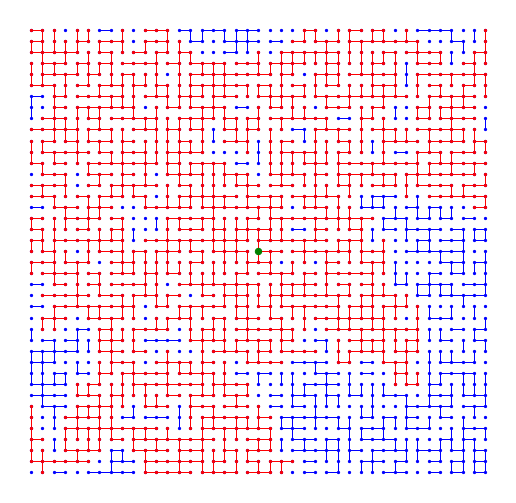

In [5]:
plt.figure(figsize=(9,9))
percolated_graph.draw(highlight_component_vertex=percolated_graph.centre_vertex_index)
plt.axis('off')

(-2.318538735678334, 46.318538735678324, -2.321679160780975, 46.32167916078097)

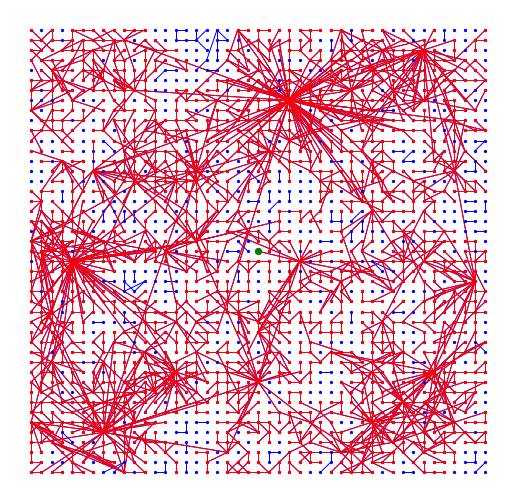

In [8]:
vertex_set = VertexSet.on_grid(width=45, dimension=2, centre_first=True)
c1 = 0.2
c2 = 0.4
girg = GIRG(vertex_set=vertex_set, alpha=4, tau=2.9, c1=c1, c2=c2, on_torus=False)
girg.sample_graph()
plt.figure(figsize=(9,9))
girg.draw(highlight_component_vertex=0)
plt.axis('off')

In [ ]:
pos = dict(enumerate(percolated_graph.vertex_set.locations.tolist()))


In [ ]:
centre_index

In [ ]:
pos[840]

In [ ]:
['r' if i!=centre_index else 'g' for i in range(graph.nr_of_nodes)]

In [ ]:
class NearestNeighborPercolation(SpatialGraph):
    SpatialGraph.make_

width = 5
dimension = 2
[list(range(width))]*dimension

In [ ]:
5 // 2

In [ ]:
[width // 2] + list(range(width//2)) + list(range(width//2 + 1, width))

In [ ]:
arrays = [width // 2] + list(range(width//2)) + list(range(width//2 + 1, width))

In [ ]:
import numpy as np

In [ ]:
np.array(np.meshgrid(*arrays)).T.reshape(-1, dimension)

In [ ]:
np.array(np.meshgrid(*arrays)).T.reshape(-1, 5)

In [ ]:
import itertools

In [ ]:
width = 4
dimension = 2

array = [width // 2] + list(range(width//2)) + list(range(width//2 + 1, width))
np.array(list(itertools.product(array, repeat=dimension)))